# Store Segmentation

## k-means

In [2]:
# import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [7]:
# import aggregated data of customers
train_data = pd.read_csv('store_seg.csv')
train_data = train_data.dropna()

In [8]:
# check the head of data
train_data.head()

,store_id,cherry_picker_skew,loyalty_skew
0,584,0.330800,0.335243
1,349,0.263750,0.618940
2,684,0.575104,0.786937
3,320,0.659029,0.858539
4,554,1.024586,0.853632


In [18]:
from sklearn import preprocessing 
# scaling the potential used columns using the min-max method
mm_scaler = preprocessing.MinMaxScaler()
x_train_minmax = mm_scaler.fit_transform(train_data)
# change the data type back to dataframe
train_data = pd.DataFrame(x_train_minmax)

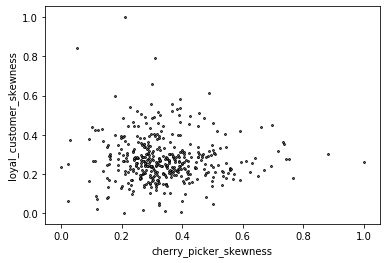

In [20]:
# plot the two measurement columns on a 2-D map
plt.scatter(
   train_data.iloc[:, 1], train_data.iloc[:, 2],
   c='white', marker='o',
   edgecolor='black', s=3
)
plt.xlabel('cherry_picker_skewness')
plt.ylabel('loyal_customer_skewness')
plt.show()

In [10]:
#Use silhouette score to measure the performance of clustering, larger score means better segmentation
range_n_clusters = list (range(2,10))

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(train_data.iloc[:,1:3])
    centers = clusterer.cluster_centers_
    score = silhouette_score(train_data.iloc[:,1:3], preds)
    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.407540188736148)
For n_clusters = 3, silhouette score is 0.38976022687715584)
For n_clusters = 4, silhouette score is 0.33256860508099634)
For n_clusters = 5, silhouette score is 0.3231539718265742)
For n_clusters = 6, silhouette score is 0.33241823706414675)
For n_clusters = 7, silhouette score is 0.3143652278062736)
For n_clusters = 8, silhouette score is 0.3251887269903394)
For n_clusters = 9, silhouette score is 0.32773659425330864)


In [21]:
# since 2 clusters is the best, I extract the model with 2 clusters
km = KMeans(
    n_clusters=2, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(train_data.iloc[:,1:3])

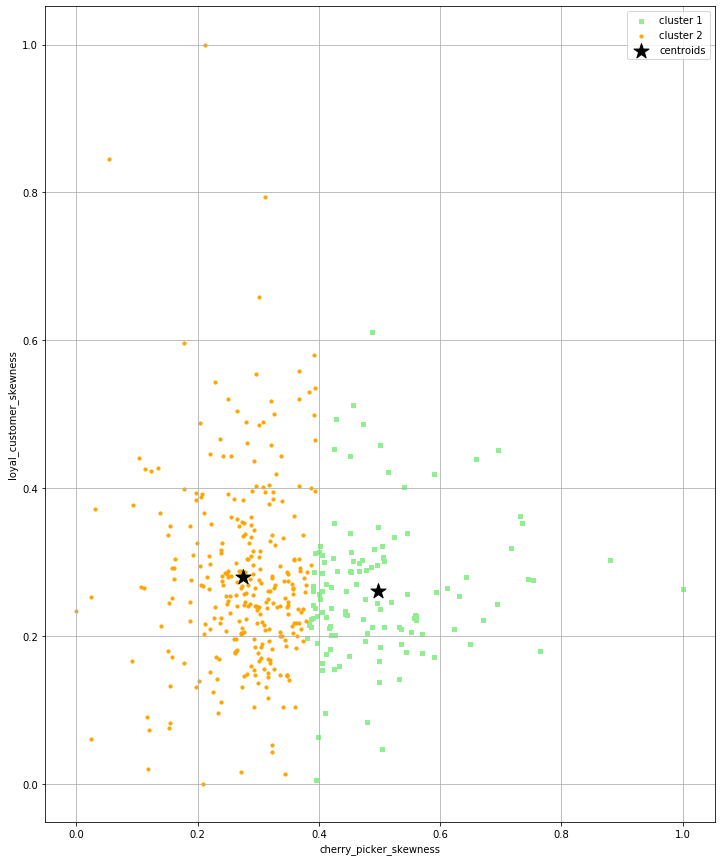

In [23]:
# plot the 2 clusters and their centers
plt.figure(figsize=(12, 15))
plt.scatter(
    train_data.iloc[y_km == 0, 1], train_data.iloc[y_km == 0, 2],
    s=10, c='lightgreen',
    marker='s', edgecolor='face',
    label='cluster 1'
)

plt.scatter(
    train_data.iloc[y_km == 1, 1], train_data.iloc[y_km == 1, 2],
    s=10, c='orange',
    marker='o', edgecolor='face',
    label='cluster 2'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='black', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.xlabel("cherry_picker_skewness")
plt.ylabel("loyal_customer_skewness")
plt.grid()
plt.show()

## hierarchy clustering

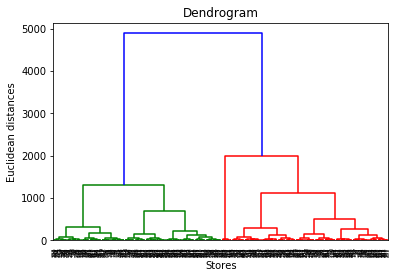

In [13]:
#Lets create a dendrogram variable linkage is actually the algorithm
dendrogram = sch.dendrogram(sch.linkage(train_data, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Stores')
plt.ylabel('Euclidean distances')
plt.show()

In [14]:
# use silhourtte again to decide the best number of clusters in hc
range_n_clusters = list (range(2,10))
print ("Number of clusters from 2 to 9: \n", range_n_clusters)

for n_clusters in range_n_clusters:
    hc = AgglomerativeClustering(n_clusters = n_clusters, affinity = 'euclidean', linkage ='ward')
    preds = hc.fit_predict(train_data.iloc[:,1:3])
    centers = clusterer.cluster_centers_
    score = silhouette_score(train_data.iloc[:,1:3], preds)
    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

Number of clusters from 2 to 9: 
 [2, 3, 4, 5, 6, 7, 8, 9]
For n_clusters = 2, silhouette score is 0.3912885426168352)
For n_clusters = 3, silhouette score is 0.3335036322553988)
For n_clusters = 4, silhouette score is 0.27368679545286795)
For n_clusters = 5, silhouette score is 0.28551533910994376)
For n_clusters = 6, silhouette score is 0.30007450656601536)
For n_clusters = 7, silhouette score is 0.29542871118089303)
For n_clusters = 8, silhouette score is 0.29591131121600295)
For n_clusters = 9, silhouette score is 0.2874783399263437)


In [27]:
# extract the 2-cluster hc model since it is the best
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage ='ward')
y_hc = hc.fit_predict(train_data.iloc[:,1:3])

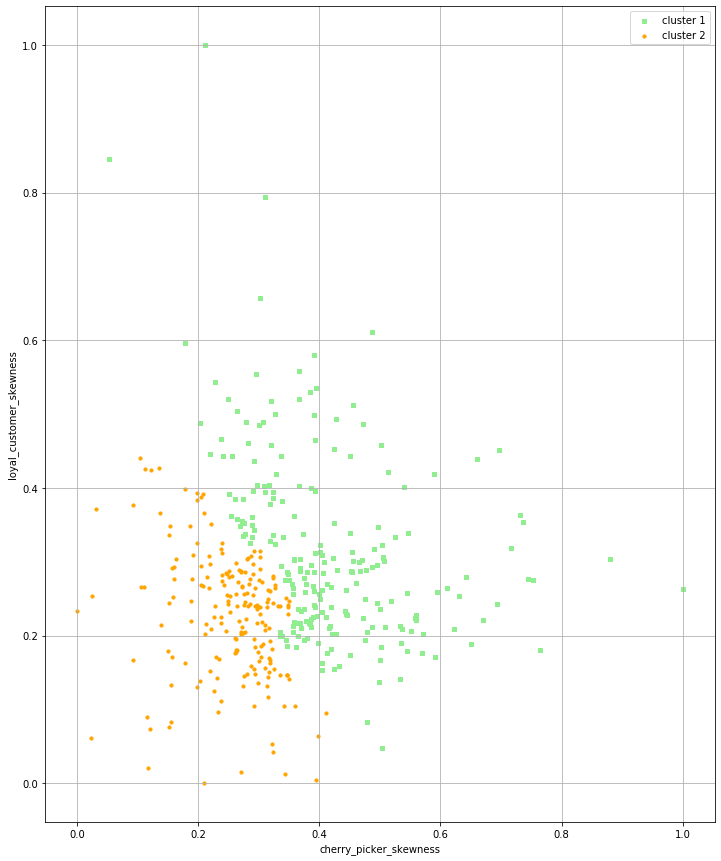

In [34]:
# plot the 2 clusters
plt.figure(figsize=(12, 15))
plt.scatter(
    train_data.iloc[y_hc == 0, 1], train_data.iloc[y_hc == 0, 2],
    s=10, c='lightgreen',
    marker='s', edgecolor='face',
    label='cluster 1'
)

plt.scatter(
    train_data.iloc[y_hc == 1, 1], train_data.iloc[y_hc == 1, 2],
    s=10, c='orange',
    marker='o', edgecolor='face',
    label='cluster 2'
)

plt.legend(scatterpoints=1)
plt.xlabel("cherry_picker_skewness")
plt.ylabel("loyal_customer_skewness")
plt.grid()
plt.show()